# Импорты и загрузка датасета

In [1]:
!pip install datasets gensim pyLDAvis --quiet

import re
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.1/75.1 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/150.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.6/443.6 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.9/193.9 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.6/221.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.3/377.3 kB 31.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [2]:
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [3]:
from datetime import datetime, timezone

now_utc = datetime.now(timezone.utc)

# Смотрим на датасет

In [4]:
ds = load_dataset("jquigl/imdb-genres")

ds

README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/54.3M [00:00<?, ?B/s]

validation.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/238256 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/29809 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/29756 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['movie title - year', 'genre', 'expanded-genres', 'rating', 'description'],
        num_rows: 238256
    })
    validation: Dataset({
        features: ['movie title - year', 'genre', 'expanded-genres', 'rating', 'description'],
        num_rows: 29809
    })
    test: Dataset({
        features: ['movie title - year', 'genre', 'expanded-genres', 'rating', 'description'],
        num_rows: 29756
    })
})

In [5]:
train = ds["train"]
train[0]

{'movie title - year': 'Flaming Ears - 1992',
 'genre': 'Fantasy',
 'expanded-genres': 'Fantasy, Sci-Fi',
 'rating': 6.0,
 'description': 'Flaming Ears is a pop sci-fi lesbian fantasy feature set in the year 2700 in the fictive burned-out city of Asche. It follows the tangled lives of three women - Volley, Nun and Spy.'}

In [6]:
df = pd.DataFrame({
    "title_year": train["movie title - year"],
    "genre": train["genre"],
    "expanded_genres": train["expanded-genres"],
    "rating": train["rating"],
    "description": train["description"],
})

df.head()

,title_year,genre,expanded_genres,rating,description
0,Flaming Ears - 1992,Fantasy,"Fantasy, Sci-Fi",6.0,Flaming Ears is a pop sci-fi lesbian fantasy f...
1,Jeg elsker dig - 1957,Romance,"Comedy, Drama, Romance",5.8,Six people - three couples - meet at random at...
2,Povjerenje - 2021,Thriller,Thriller,NaN,"In a small unnamed town, in year 2025, Krsto w..."
3,Gulliver Returns - 2021,Fantasy,"Animation, Adventure, Family",4.4,The legendary Gulliver returns to the Kingdom ...
4,Prithvi Vallabh - 1924,Biography,"Biography, Drama, Romance",NaN,"Seminal silent historical film, the story feat..."


Обычно по этому датасету делают классификацию, но мы будем пытаться определить, о чем пишут в отзывах

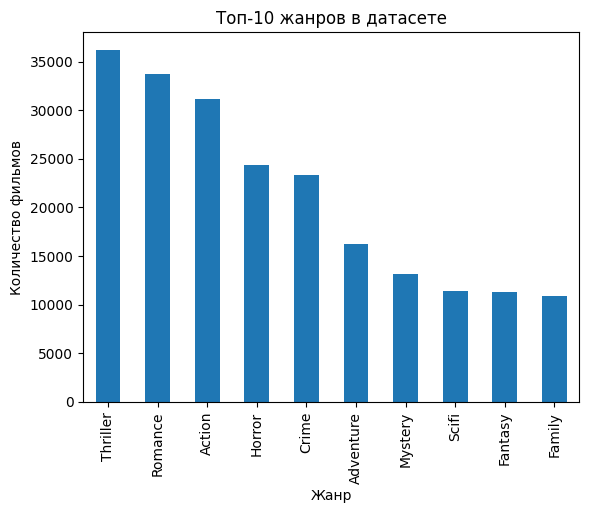

In [7]:
df["genre"].value_counts().head(10).plot(kind="bar")
plt.title("Топ-10 жанров в датасете")
plt.xlabel("Жанр")
plt.ylabel("Количество фильмов")
plt.show()

In [8]:
df = df.sample(5000, random_state=42).reset_index(drop=True)
len(df)

5000

Очистка текстов описаний


In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('punkt')

# Инициализируем инструменты
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
def simple_clean(text):
    text = str(text).lower()
    # только латинские буквы и пробелы
    text = re.sub(r"[^a-z ]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["clean_text"] = df["description"].apply(simple_clean)
df[["description", "clean_text"]].head()

,description,clean_text
0,Na Cha is sent to the land of the dead to figh...,na cha is sent to the land of the dead to figh...
1,"This full-contact action drama, loaded with au...",this full contact action drama loaded with aut...
2,"Rahul, the son of a very rich man who has lost...",rahul the son of a very rich man who has lost ...
3,Two twin barbarians seek revenge from the warl...,two twin barbarians seek revenge from the warl...
4,When a farm boy's village is cursed by a myste...,when a farm boy s village is cursed by a myste...


Токенизация

In [10]:
df["tokens"] = df["clean_text"].str.split()
df["tokens"].head()

,tokens
0,"[na, cha, is, sent, to, the, land, of, the, de..."
1,"[this, full, contact, action, drama, loaded, w..."
2,"[rahul, the, son, of, a, very, rich, man, who,..."
3,"[two, twin, barbarians, seek, revenge, from, t..."
4,"[when, a, farm, boy, s, village, is, cursed, b..."


In [23]:
def remove_stopwords(lst):
  for word in lst:
    if word in stop_words:
      lst.remove(word)
  return lst

In [24]:
df["tokens"] = df["tokens"].apply(remove_stopwords)
df["tokens"].head()

,tokens
0,"[na, cha, sent, land, dead, fight, seven, devils]"
1,"[full, contact, action, drama, loaded, authent..."
2,"[rahul, son, rich, man, lost, love, sets, jour..."
3,"[two, twin, barbarians, seek, revenge, warlord..."
4,"[farm, boy, village, cursed, mysterious, plagu..."


Для работы LDA-модели нужны словарь (список всех слов во всех исследуемых текстах) и корпус (статистика важности слов). Обычно в качестве корпуса используется просто "мешок слов" – список слов с количеством вхождений для каждого (чем слово чаще встречается, тем оно "важнее" для данного набора текстов).

In [25]:
texts = df["tokens"].tolist()

dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.4)
dictionary.compactify()

print("Размер словаря:", len(dictionary))

corpus = [dictionary.doc2bow(text) for text in texts]
print("Документов в корпусе:", len(corpus))
print("Пример BoW для одного документа:", corpus[0][:10])

Размер словаря: 3007
Документов в корпусе: 5000
Пример BoW для одного документа: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


Теперь займемся обучением LDA

**Параметры:**

`num_topics` - это количество тем. Это основной параметр и настраивать его проще всего. Обычно 200 оптимальное значение. Можно поставить поменьше, если тексты не очень разнообразные или хочется уменьшить время обучения.

`passes` - задает количество проходов по данным. Чем больше, тем лучше сойдется модель, но обучаться будет дольше.

In [26]:
num_topics = 6

lda = LdaMulticore(
    corpus=corpus,
    id2word=dictionary,
    num_topics=num_topics,
    passes=5,
    random_state=42
)

In [27]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.030364  0.050555       1        1  20.853434
0      0.030122  0.048498       2        1  19.108718
3      0.030766 -0.010532       3        1  17.501217
2      0.016464  0.001843       4        1  16.351182
5      0.010640 -0.103859       5        1  13.508580
4     -0.118356  0.013495       6        1  12.676870, topic_info=         Term         Freq        Total Category  logprob  loglift
14      story   348.000000   348.000000  Default  30.0000  30.0000
96    summary  1197.000000  1197.000000  Default  29.0000  29.0000
94        see  1253.000000  1253.000000  Default  28.0000  28.0000
10       full  1246.000000  1246.000000  Default  27.0000  27.0000
19       love   337.000000   337.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
168     young    30.668658   548.322600   Topic6  -5.5648  -0.8182
1014      new    26.390498   264.813935   Topic6  -5.7150  -0.2406
71       time    24.351282   182.000760   Topic6  -5.7954   0.0540
943     lives    23.311943   173.368657   Topic6  -5.8390   0.0589
32        two    23.233276   333.528499   Topic6  -5.8424  -0.5988

[473 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
875       2  0.877422   absence
784       1  0.484063  accident
784       2  0.212988  accident
784       3  0.077450  accident
784       4  0.135538  accident
...     ...       ...       ...
168       5  0.069302     young
168       6  0.056536     young
1533      1  0.131997         z
1533      3  0.791982         z
1533      4  0.131997         z

[1267 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3, 6, 5])

Параметр **λ** (лямбда) в `pyLDAvis` — это регулятор баланса между двумя критериями релевантности терминов в выбранной теме.

**λ = 1** помогает увидеть самые частые слова темы (даже общеупотребительные).

**λ = 0** выделяет уникальные слова темы, которые редко встречаются в других темах.

Попробуйте отрегулировать значения всех параметров и проследить за изменениями.